<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.6 MB 2.3 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.6 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.6 MB 2.3 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/11.6 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.6 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.6 MB 2.3 MB/s eta 0:00:04
   -------------- ------------------------- 4.2/11.6 MB 2.3 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.6 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.6 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 5.8/11.6 MB 2.3 MB/s eta 0:00:03
   ----------

In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [52]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [53]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [54]:
print(X)

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

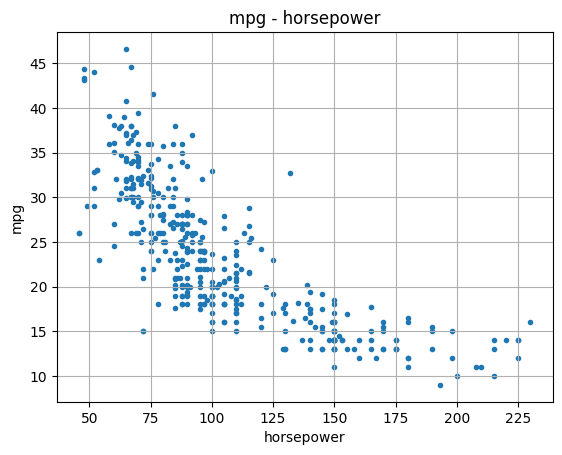

In [79]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    """
    Usamos de Matplotlib la funcion scatter para representar nuestro grafico con los datos previamentes cargados del dataset
    """
    
    plt.scatter(df[nombre_columna], y, marker='.', linestyle='None') 
    plt.title(f"mpg - {nombre_columna}")
    plt.xlabel(nombre_columna)
    plt.ylabel("mpg")
    plt.grid(True)
    plt.show()                        


visualiza(X, y, "horsepower")

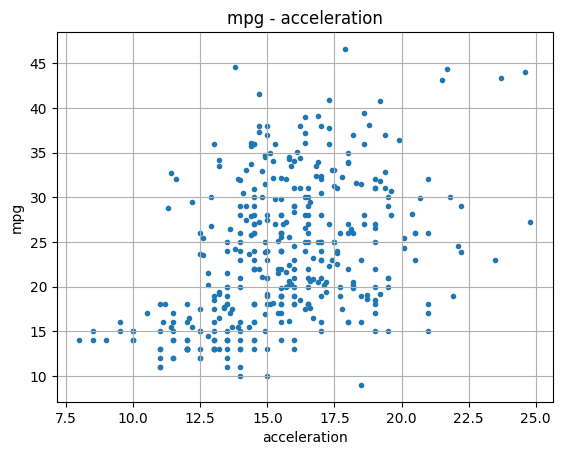

In [56]:
visualiza(X, y, "acceleration")

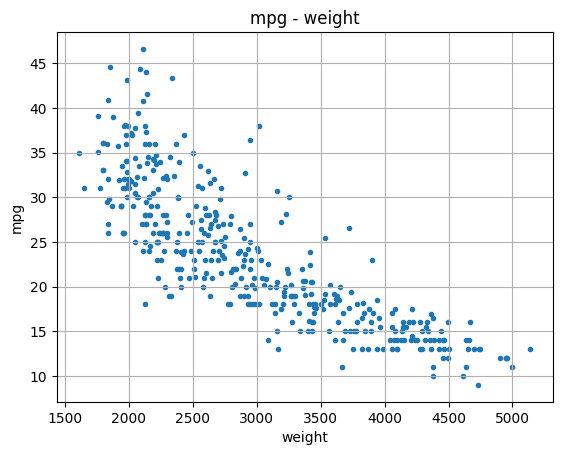

In [57]:
visualiza(X, y, "weight")

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [70]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    """
    Para poder ver las dimensiones de nuestras matrices vamos a utilizar el metdo shape y en caso
    de que la matriz este mal dimensionada generamos la traspuesta de la matriz con el metodo .T
    """
    if X.shape[0] < X.shape[1]:
        X = X.T  
        
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    """
    Añadimos una columna de unos a la matriz X usando `np.hstack` 
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # TODO 3 Calcula los pesos
    """
    Calculamos los pesos usando la funcion linalg.solve tambien se puede hacer mediante la funcion
    np.linalg.inv(X.T @ X) @ X.T @ pero en terminos de eficiencia y como hemos visto es mucho mejor con solve
    """
    w = np.linalg.solve(X.T @ X, X.T @ y)
    
    return w

In [71]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

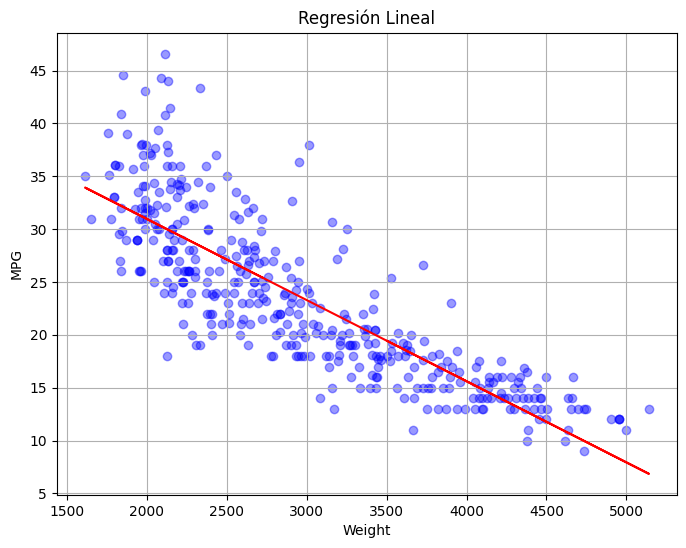

In [72]:
"""
Volvemos a cargar la X y la Y con los valores del dataframe y las transformamos a matrices para poder operar con ellas con .to_numpy()
"""
auto_mpg = fetch_ucirepo(id=9) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
X_df = X[["weight"]].to_numpy()
y_df = y.to_numpy() 
"""
Llamamos a la función previamente creada `pesos_ols` con los datos de X_df y y_df, 
que calculará los coeficientes del modelo de regresión y nos devolverá en una matriz.
"""
coef = pesos_ols(X_df, y_df)
"""
Creamos una nueva matriz con el mismo número de filas que X_df, pero rellenamos su primera columna con unos. 
Luego, combinamos esta matriz con X_df para añadir el término constante (intercepto).
"""
X_bias = np.hstack((np.ones((X_df.shape[0], 1)), X_df))  
"""
Generamos la predicción realizando el producto matricial entre X_bias y coef
"""
y_pred = X_bias @ coef 
"""
Generamos nuestra grafica, los puntos con el scatter(datos reales) y la linea roja(prediccion)con el plot
"""
plt.figure(figsize=(8, 6))
plt.scatter(X_df, y_df, color="blue", alpha=0.4)  
plt.plot(X_df, y_pred, color="red") 
plt.title("Regresión Lineal")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.grid(True)
plt.show()

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [50]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.6 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.3 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 2.3 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.3 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.1 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.3 MB/s eta 0:00:03
   -------------------- ---

In [73]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [77]:
print(f"punto de corte: {coef[0]}")
print(f"punto de Pendiente: {coef[1]}")

punto de corte: [46.31736442]
punto de Pendiente: [-0.00767661]


Podemos observar que nuestra función de `pesos_ols` y este código usando la libreria de `scikit-learn` nos han dado el mismo resultado, Esto nos confirma que nuestra función esta correctamente implementada, ya que ambas estan resolviendo el mismo problema matemático el calculo de los coeficientes que minimizan el error en los minimos cuadrados ordinarios.

Es mucho mas sencillo de implementar mediante la libreria scikit-learn ya que no tienes que convertir los datasets, tomar transpuestas o añadir unos a las matrices.

## 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



**método de mínimos cuadrados ordinarios:** resuelve directamente la formula matemática para calcular los coeficientes de la regresión lineal, proporcionando una solución exacta. Funciona exclusivamente con funciones convexas y es muy rápido y eficiente en datasets pequeños o medianos, pero tiene dificultades con datasets grandes debido al costo computacional de invertir matrices. 

**descenso del gradiente:** es un método iterativo que ajusta los coeficientes gradualmente para minimizar el error. Es más flexible y puede aplicarse a modelos más complejos (convexos y no convexos). Escala bien con datasets grandes, ya que no requiere invertir matrices, pero puede necesitar muchas iteraciones para converger y requiere ajustar parámetros como la tasa de aprendizaje.

En general, el método de mínimos cuadrados es ideal para problemas pequeños y bien definidos, mientras que el descenso del gradiente es preferible para datasets grandes o modelos complejos.
